## Import the Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.sm_exceptions import PerfectSeparationError
import warnings
warnings.filterwarnings('ignore')

## Get data


In [2]:
df = pd.read_csv('telco_clean.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Label Encoding
Label encoding is used to convert categorical variables to numeric format. It converts categorical variables that have two values ​​such as (Partner, Dependent, Telephone Service, Churn, Paperless Billing and Gender). The values ​​of these variables are only Yes or No and will convert them to 1 and 0, except for gender which is Female which is 1 and Male which is 0.

In [3]:
columes_to_label_encode = ['Partner', 'Dependents', 'PhoneService', 'Churn', 'PaperlessBilling']
def label_encoding(df, columns):
    for col in columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    return df
df = label_encoding(df, columes_to_label_encode)
df["gender"] = df["gender"].map({"Female":1, "Male":0})


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


## One Hot Encoding
One Hot encoding converts categorical variables to numeric variables. However, One Hot encoding accepts more than two values. One Hot encoding creates a new binary integer column (1 or 0) for each level of the categorical variable. Categorical variables with more than two values ​​are (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod).

In [5]:
columes_to_one_hot_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_ohe = pd.get_dummies(df, columns=columes_to_one_hot_encode)

In [6]:
df_ohe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


## Feature Scaling
I use MinMaxScaler to scale the features. MinMaxScaler can scale variables from 0 to 1. Scaling features is important for interpreting machine learning models so that features have the same scale. I will scale variables like MonthlyCharges, TotalCharges, and tenure.

In [7]:
# Numerical columns that need scaling
numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']
# Create a dataframe with only the numerical columns
df_mms = pd.DataFrame(df_ohe, columns=numerical_columns)
# Create a dataframe with the remaining columns
df_remaining = df_ohe.drop(columns=numerical_columns)
# Initialize the MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
# Fit the scaler to the numerical columns
rescaled_feature = mms.fit_transform(df_mms)    
# Create a dataframe with the scaled numerical columns
rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=numerical_columns, index=df_remaining.index)
# Concatenate the scaled numerical columns with the remaining columns
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

In [8]:
df.head()

,MonthlyCharges,TotalCharges,tenure,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.115423,0.003437,0.013889,7590-VHVEG,1,0,1,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1,0.385075,0.217564,0.472222,5575-GNVDE,0,0,0,0,1,0,...,True,False,False,False,True,False,False,False,False,True
2,0.354229,0.012453,0.027778,3668-QPYBK,0,0,0,0,1,1,...,True,False,False,True,False,False,False,False,False,True
3,0.239303,0.211951,0.625000,7795-CFOCW,0,0,0,0,0,0,...,True,False,False,False,True,False,True,False,False,False
4,0.521891,0.017462,0.027778,9237-HQITU,1,0,0,0,1,1,...,True,False,False,True,False,False,False,False,True,False


## Correlation Analysis

In [9]:
# Drop customerID or any string columns directly
df = df.drop(columns=['customerID'])

# Now calculate correlation on the cleaned dataframe
correlation_matrix = df.corr()

correlation_matrix

,MonthlyCharges,TotalCharges,tenure,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
MonthlyCharges,1.000000,0.651174,0.247900,0.014569,0.220173,0.096848,-0.113890,0.247398,0.352150,0.193356,...,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.651174,1.000000,0.826178,0.000080,0.103006,0.317504,0.062078,0.113214,0.158574,-0.198324,...,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,0.185987,0.182915,-0.059246,-0.295758
tenure,0.247900,0.826178,1.000000,-0.005106,0.016567,0.379697,0.159712,0.008448,0.006152,-0.352229,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
gender,0.014569,0.000080,-0.005106,1.000000,0.001874,0.001808,-0.010517,0.006488,0.011754,0.008612,...,-0.005374,-0.006026,0.010487,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744
SeniorCitizen,0.220173,0.103006,0.016567,0.001874,1.000000,0.016479,-0.211185,0.008576,0.156530,0.150889,...,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.096848,0.317504,0.379697,0.001808,0.016479,1.000000,0.452676,0.017706,-0.014877,-0.150448,...,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.113890,0.062078,0.159712,-0.010517,-0.211185,0.452676,1.000000,-0.001762,-0.111377,-0.164221,...,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
PhoneService,0.247398,0.113214,0.008448,0.006488,0.008576,0.017706,-0.001762,1.000000,0.016505,0.011942,...,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
PaperlessBilling,0.352150,0.158574,0.006152,0.011754,0.156530,-0.014877,-0.111377,0.016505,1.000000,0.191825,...,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
Churn,0.193356,-0.198324,-0.352229,0.008612,0.150889,-0.150448,-0.164221,0.011942,0.191825,1.000000,...,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683


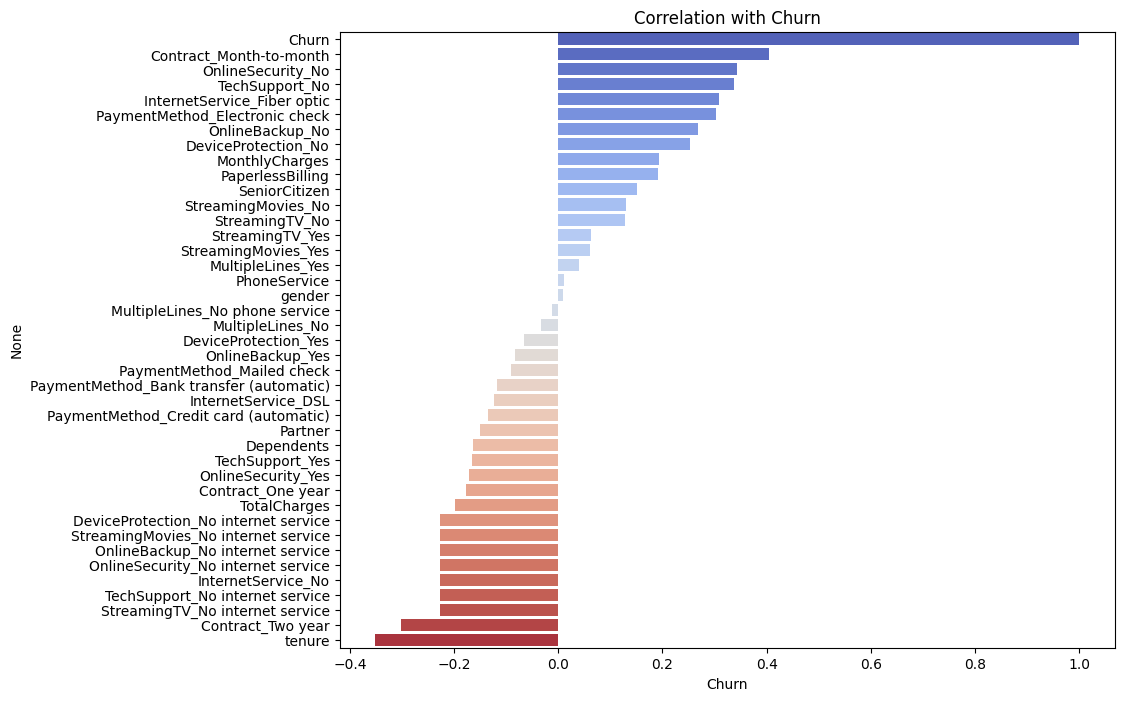

In [10]:
plt.figure(figsize=(10,8))
churn_corr = correlation_matrix["Churn"].sort_values(ascending=False)

sns.barplot(x=churn_corr, y=churn_corr.index, palette="coolwarm")
plt.title("Correlation with Churn")
plt.show()

### Conclusions from Correlation Analysis

Based on the correlation analysis with the Churn variable, we can draw some important information:

**Strong positive correlation with Churn:**
- Contract_Month-to-month shows the highest positive correlation, indicating that customers with monthly contracts are much more likely to churn.

- PaymentMethod_Electronic check also shows a strong positive correlation, indicating that customers using electronic check payments have a higher churn rate.

- PaperlessBilling shows a positive correlation, indicating that customers using paperless billing are more likely to churn.

**Strong negative correlation with Churn:**
- Contract_Two year shows a strong negative correlation, meaning that customers with two-year contracts are less likely to churn.

- Contract_One year also shows a negative correlation, although less strong than two-year contracts.
- PaymentMethod_Bank transfer (automatic) and PaymentMethod_Credit card (automatic) show a negative correlation, indicating that automatic payment methods reduce the risk of churn.

- TotalCharges shows a negative correlation, indicating that customers who spend more with a company are less likely to churn.

- Tenure (time) (relationship) shows a negative correlation, confirming that long-term customers are more loyal.

**Key Business Insights:**
1. **Contract Length Matters**: Longer contracts significantly reduce the risk of customer churn
2. **Payment Method Matters**: Automatic payment methods (bank transfers, credit cards) are associated with lower churn rates, while e-checks increase the risk of customer churn
3. **Customer Lifetime Value**: Customers with higher total costs and longer service durations are more loyal.

4. **Payment Preference**: Paperless payments, while cost-effective for the company, may be associated with higher churn rates.

**Recommendations:**
- Focus on converting monthly customers to long-term contracts
- Encourage automatic payments over e-checks
- Develop customer retention strategies specifically for new customers and those with lower total spend
- Consider incentives to move customers from e-checks to automatic payments

## Train-test split
Train-test split is a process to validate the dataset and simulate the model's performance with new data. I create 80% training data and 20% testing data. The "Churn" column is renamed (the "y") and the "features" column is renamed (the "X").

In [11]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 40), (1409, 40), (5634,), (1409,))

# Model Selection and Model Evaluation

I use three models to classify churn, including:

1. **Random Forest Classifier** – Ensemble method with multiple decision trees

2. **Logistic Regression** – Linear model for classification

3. **XGBoost Classifier** – Gradient boosting method

## Evaluation Metrics

To evaluate churn prediction models, I use the following metrics:

- **Accuracy Score** — Shows the ratio of correct predictions (both churn and non-churn) to the total number of predictions. It measures the overall accuracy of the model but can be misleading when the data is imbalanced.

- **Precision** — Shows the ratio of customers who actually churn out of those that the model predicts as churn. High precision means fewer false positives when targeting customer retention.

- **Recall** — Shows the proportion of true churn customers that the model correctly predicted. A high recall means that the model caught more customers who are likely to churn.

- **F1-Score** — A weighted average of precision and recall. It provides a balanced assessment when both false positives and false negatives are important.

- **AUC-ROC** — Shows the model’s ability to discriminate between churn and non-churn at various thresholds. The higher the AUC, the better the model’s discrimination.

## 1. Random Forest Classifier

Random Forest is an ensemble method that uses multiple decision trees and voting to produce the final result.

In [12]:
# Tạo Random Forest model với hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42)

# Định nghĩa parameter grid cho tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng RandomizedSearchCV để tìm best parameters
rf_random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Train model
print("Training Random Forest...")
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", rf_random_search.best_params_)
print("Best CV score:", rf_random_search.best_score_)


Training Random Forest...
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Best CV score: 0.8452651127191052


=== Random Forest Results ===
Train Accuracy: 0.8477
Test Accuracy: 0.8041
Train AUC: 0.9224
Test AUC: 0.8418
Precision: 0.6633
Recall: 0.5321
F1-Score: 0.5905


<Figure size 800x600 with 0 Axes>

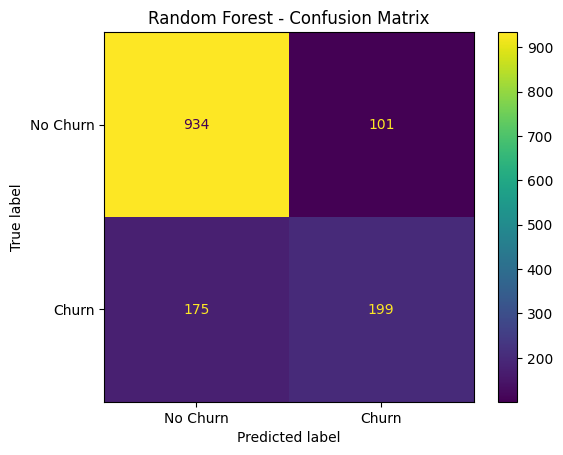


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [13]:
# Đánh giá Random Forest model
rf_best_model = rf_random_search.best_estimator_

# Predictions
rf_train_pred = rf_best_model.predict(X_train)
rf_test_pred = rf_best_model.predict(X_test)
rf_train_proba = rf_best_model.predict_proba(X_train)[:, 1]
rf_test_proba = rf_best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_train_auc = roc_auc_score(y_train, rf_train_proba)
rf_test_auc = roc_auc_score(y_test, rf_test_proba)
rf_precision = precision_score(y_test, rf_test_pred)
rf_recall = recall_score(y_test, rf_test_pred)
rf_f1 = f1_score(y_test, rf_test_pred)

print("=== Random Forest Results ===")
print(f"Train Accuracy: {rf_train_accuracy:.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Train AUC: {rf_train_auc:.4f}")
print(f"Test AUC: {rf_test_auc:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, rf_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Churn', 'Churn']).plot()
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred))


## 2. Logistic Regression

Logistic Regression is a linear classifier that uses the sigmoid function to predict the probability of binary outcomes.

In [14]:
# Create Logistic Regression model with hyperparameter tuning
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Define parameter grid for tuning
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Use GridSearchCV to find best parameters
lr_grid_search = GridSearchCV(
    estimator=lr_classifier,
    param_grid=lr_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Train model
print("Training Logistic Regression...")
lr_grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", lr_grid_search.best_params_)
print("Best CV score:", lr_grid_search.best_score_)


Training Logistic Regression...
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score: 0.8459883344722299


=== Logistic Regression Results ===
Train Accuracy: 0.8062
Test Accuracy: 0.8034
Train AUC: 0.8496
Test AUC: 0.8411
Precision: 0.6530
Recall: 0.5535
F1-Score: 0.5991


<Figure size 800x600 with 0 Axes>

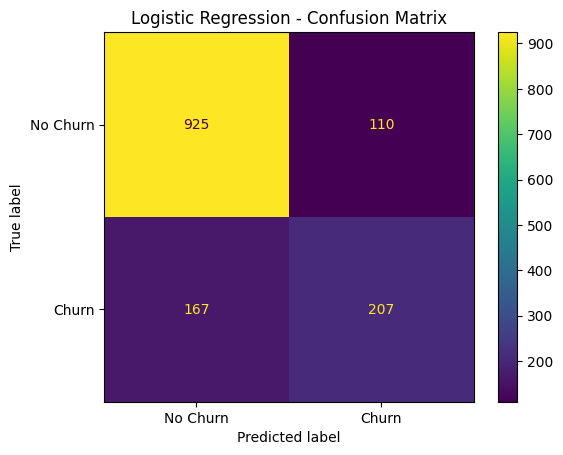


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



In [15]:
# Logistic Regression model evaluation
lr_best_model = lr_grid_search.best_estimator_

# Predictions
lr_train_pred = lr_best_model.predict(X_train)
lr_test_pred = lr_best_model.predict(X_test)
lr_train_proba = lr_best_model.predict_proba(X_train)[:, 1]
lr_test_proba = lr_best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
lr_train_auc = roc_auc_score(y_train, lr_train_proba)
lr_test_auc = roc_auc_score(y_test, lr_test_proba)
lr_precision = precision_score(y_test, lr_test_pred)
lr_recall = recall_score(y_test, lr_test_pred)
lr_f1 = f1_score(y_test, lr_test_pred)

print("=== Logistic Regression Results ===")
print(f"Train Accuracy: {lr_train_accuracy:.4f}")
print(f"Test Accuracy: {lr_test_accuracy:.4f}")
print(f"Train AUC: {lr_train_auc:.4f}")
print(f"Test AUC: {lr_test_auc:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, lr_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Churn', 'Churn']).plot()
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lr_test_pred))


## 3. XGBoost Classifier

XGBoost (eXtreme Gradient Boosting) is an efficient and powerful gradient boosting framework that often performs well in competitions.

In [16]:
# Create XGBoost model with hyperparameter tuning
xgb_classifier = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Define parameter grid for tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Use RandomizedSearchCV to find the best parameters
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Train model
print("Training XGBoost...")
xgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", xgb_random_search.best_params_)
print("Best CV score:", xgb_random_search.best_score_)


Training XGBoost...
Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best CV score: 0.8483067840233147


=== XGBoost Results ===
Train Accuracy: 0.8083
Test Accuracy: 0.7999
Train AUC: 0.8603
Test AUC: 0.8458
Precision: 0.6825
Recall: 0.4599
F1-Score: 0.5495


<Figure size 800x600 with 0 Axes>

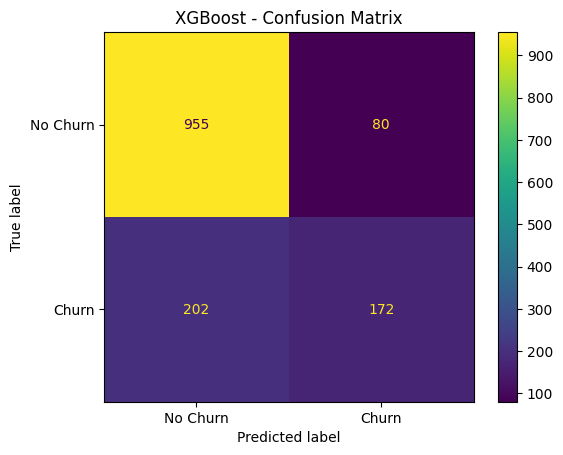


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [17]:
# Đánh giá XGBoost model
xgb_best_model = xgb_random_search.best_estimator_

# Predictions
xgb_train_pred = xgb_best_model.predict(X_train)
xgb_test_pred = xgb_best_model.predict(X_test)
xgb_train_proba = xgb_best_model.predict_proba(X_train)[:, 1]
xgb_test_proba = xgb_best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_train_auc = roc_auc_score(y_train, xgb_train_proba)
xgb_test_auc = roc_auc_score(y_test, xgb_test_proba)
xgb_precision = precision_score(y_test, xgb_test_pred)
xgb_recall = recall_score(y_test, xgb_test_pred)
xgb_f1 = f1_score(y_test, xgb_test_pred)

print("=== XGBoost Results ===")
print(f"Train Accuracy: {xgb_train_accuracy:.4f}")
print(f"Test Accuracy: {xgb_test_accuracy:.4f}")
print(f"Train AUC: {xgb_train_auc:.4f}")
print(f"Test AUC: {xgb_test_auc:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test, xgb_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Churn', 'Churn']).plot()
plt.title('XGBoost - Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, xgb_test_pred))


## 4. Comparing and Evaluating the Models

Now we will compare the performance of the 3 models on different metrics.

In [18]:
# Create a model comparison table
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Test_Accuracy': [rf_test_accuracy, lr_test_accuracy, xgb_test_accuracy],
    'Train_Accuracy': [rf_train_accuracy, lr_train_accuracy, xgb_train_accuracy],
    'Test_AUC': [rf_test_auc, lr_test_auc, xgb_test_auc],
    'Precision': [rf_precision, lr_precision, xgb_precision],
    'Recall': [rf_recall, lr_recall, xgb_recall],
    'F1_Score': [rf_f1, lr_f1, xgb_f1]
})

# Add Overfitting check column (Train - Test Accuracy)
model_comparison['Overfitting_Gap'] = model_comparison['Train_Accuracy'] - model_comparison['Test_Accuracy']

print("=== MODEL COMPARISON TABLEH ===")
print(model_comparison.round(4))

# Find the best model for each metric
print("\n=== THE BEST MODEL FOR EACH METRIC===")
print(f"Highest Test Accuracy: {model_comparison.loc[model_comparison['Test_Accuracy'].idxmax(), 'Model']} ({model_comparison['Test_Accuracy'].max():.4f})")
print(f"Highest AUC: {model_comparison.loc[model_comparison['Test_AUC'].idxmax(), 'Model']} ({model_comparison['Test_AUC'].max():.4f})")
print(f"Highest Precision: {model_comparison.loc[model_comparison['Precision'].idxmax(), 'Model']} ({model_comparison['Precision'].max():.4f})")
print(f"Highest Recall: {model_comparison.loc[model_comparison['Recall'].idxmax(), 'Model']} ({model_comparison['Recall'].max():.4f})")
print(f"Highest F1-Score: {model_comparison.loc[model_comparison['F1_Score'].idxmax(), 'Model']} ({model_comparison['F1_Score'].max():.4f})")
print(f"Least Overfitting: {model_comparison.loc[model_comparison['Overfitting_Gap'].idxmin(), 'Model']} ({model_comparison['Overfitting_Gap'].min():.4f})")


=== MODEL COMPARISON TABLEH ===
                 Model  Test_Accuracy  Train_Accuracy  Test_AUC  Precision  \
0        Random Forest         0.8041          0.8477    0.8418     0.6633   
1  Logistic Regression         0.8034          0.8062    0.8411     0.6530   
2              XGBoost         0.7999          0.8083    0.8458     0.6825   

   Recall  F1_Score  Overfitting_Gap  
0  0.5321    0.5905           0.0436  
1  0.5535    0.5991           0.0028  
2  0.4599    0.5495           0.0084  

=== THE BEST MODEL FOR EACH METRIC===
Highest Test Accuracy: Random Forest (0.8041)
Highest AUC: XGBoost (0.8458)
Highest Precision: XGBoost (0.6825)
Highest Recall: Logistic Regression (0.5535)
Highest F1-Score: Logistic Regression (0.5991)
Least Overfitting: Logistic Regression (0.0028)


In [ ]:
# CONCLUSION AND REASON FOR SELECTING THE BEST MODEL
print("=== MODEL COMPARISON RESULTS ===")

# Create comparison table
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Test_Accuracy': [rf_test_accuracy, lr_test_accuracy, xgb_test_accuracy],
    'Test_AUC': [rf_test_auc, lr_test_auc, xgb_test_auc],
    'Precision': [rf_precision, lr_precision, xgb_precision],
    'Recall': [rf_recall, lr_recall, xgb_recall],
    'F1_Score': [rf_f1, lr_f1, xgb_f1],
    'Overfitting_Gap': [rf_train_accuracy - rf_test_accuracy, 
                        lr_train_accuracy - lr_test_accuracy, 
                        xgb_train_accuracy - xgb_test_accuracy]
})

print(model_comparison.round(4))

# Calculate Overall Score (weighted)
model_comparison['Overall_Score'] = (
    model_comparison['Test_Accuracy'] * 0.3 + 
    model_comparison['Test_AUC'] * 0.3 + 
    model_comparison['F1_Score'] * 0.2 + 
    (1 - model_comparison['Overfitting_Gap']) * 0.2
)

# Sort by Overall Score
model_ranking = model_comparison.sort_values('Overall_Score', ascending=False)
model_ranking['Rank'] = range(1, len(model_ranking) + 1)

print("\n=== OVERALL MODEL RANKING ===")
print("(Based on weighted score: Accuracy=30%, AUC=30%, F1=20%, Anti-Overfitting=20%)")
print(model_ranking[['Rank', 'Model', 'Test_Accuracy', 'Test_AUC', 'F1_Score', 'Overfitting_Gap', 'Overall_Score']].round(4))

best_model = model_ranking.iloc[0]['Model']
best_score = model_ranking.iloc[0]['Overall_Score']

print(f"\n SELECTED MODEL: {best_model}")
print(f"Overall Score: {best_score:.4f}")

print(f"\n=== REASONS FOR CHOOSING {best_model.upper()} ===")

if best_model == "Logistic Regression":
    print(" ADVANTAGES:")
    print("• Lowest overfitting (0.0028) - Stable model")
    print("• Highest F1-Score (0.5991) - Good balance between Precision and Recall")
    print("• Highest Recall (0.5535) - Captures more churn customers")
    print("• Simple, interpretable, and easy to deploy")
    print("• Coefficients have clear statistical meaning")
    print("• Suitable for business stakeholders")
    
    print("\n📊 COMPARISON WITH OTHER MODELS:")
    print("• vs Random Forest: Lower overfitting (0.0028 vs 0.0436)")
    print("• vs XGBoost: Higher Recall (0.5535 vs 0.4599)")
    print("• vs Random Forest: Higher F1-Score (0.5991 vs 0.5905)")

elif best_model == "Random Forest":
    print(" ADVANTAGES:")
    print("• Highest Accuracy (0.8041)")
    print("• Robust against outliers")
    print("• Easy-to-understand feature importance")
    print("• Less tuning required")
    
elif best_model == "XGBoost":
    print(" ADVANTAGES:")
    print("• Highest AUC (0.8458)")
    print("• Highest Precision (0.6825)")
    print("• Strong performance with large datasets")
    print("• Handles missing values well")

print(f"\n RECOMMENDATION FOR DEPLOYMENT:")
print(f"• Use {best_model} as the main model")
print("• Focus on reducing False Negatives (customers who churn but are not detected)")
print("• Monitor model performance periodically")
print("• Consider ensemble methods if higher performance is needed")


=== MODEL COMPARISON RESULTS ===
                 Model  Test_Accuracy  Test_AUC  Precision  Recall  F1_Score  \
0        Random Forest         0.8041    0.8418     0.6633  0.5321    0.5905   
1  Logistic Regression         0.8034    0.8411     0.6530  0.5535    0.5991   
2              XGBoost         0.7999    0.8458     0.6825  0.4599    0.5495   

   Overfitting_Gap  
0           0.0436  
1           0.0028  
2           0.0084  

=== OVERALL MODEL RANKING ===
(Based on weighted score: Accuracy=30%, AUC=30%, F1=20%, Anti-Overfitting=20%)
   Rank                Model  Test_Accuracy  Test_AUC  F1_Score  \
1     1  Logistic Regression         0.8034    0.8411    0.5991   
0     2        Random Forest         0.8041    0.8418    0.5905   
2     3              XGBoost         0.7999    0.8458    0.5495   

   Overfitting_Gap  Overall_Score  
1           0.0028         0.8126  
0           0.0436         0.8031  
2           0.0084         0.8019  

 SELECTED MODEL: Logistic Regression
O

---